<center>
PERBANDINGAN KINERJA EXTREME GRADIENT BOOST DAN LOGISTIC REGRESSION DALAM MEMPREDIKSI TINGKAT OBESITAS BERDASARKAN POLA HIDUP SEHARI-HARI


---





# Dataset

Dataset: https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`Gender`|`str`|Jenis kelamin (Female/Male)|
|`Age`|`float`|Umur|
|`Height`|`float`|Tinggi badan|
|`Weight`|`float`|Berat badan|
|`family_history_with_overweight`|`str`|Apa ada keluarga yang memiliki/pernah obesitas? (yes/no)|
|`FAVC`|`str`|Apa sering konsumsi makanan tinggi kalori? (yes/no)|
|`FCVC`|`float`|Frekuensi konsumsi sayuran dalam makan?|
|`NCP`|`float`|Jumlah makanan utama yang dikonsumsi per hari|
|`CAEC`|`str`|Apa sering konsumsi camilan di antara waktu makan? (Always, Frequently, Sometimes, no)|
|`SMOKE`|`str`|Apakah merokok?(yes/no)|
|`CH20`|`float`|Jumlah air yang diminum setiap hari? (dalam liter)|
|`SCC`|`str`|Apa memantau kalori yang mereka konsumsi setiap hari? (yes/no)|
|`FAF`|`float`|Frekuensi aktivitas fisik dalam seminggu (seminggu berapa kali aktivitas fisik)|
|`TUE`|`float`|Jumlah waktu yang dihabiskan tiap hari untuk menggunakan perangkat teknologi|
|`CALC`|`str`|Frekuensi konsumsi alkohol (Always, Frequently, Sometimes, no)|
|`MTRANS`|`str`|Jenis transportasi yang biasa digunakan (Automobile, Bike, Motorbike, Public_Transportation, Walking)|
|`Obesity` **Target**| `str` | Tingkat obesitas seseorang (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III)|

In [1]:
import pandas as pd
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Obesity prediction.csv')

# EDA

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [5]:
df.shape

(2111, 17)

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### missing value

In [7]:
# Cek data yang hilang
missing_data = df.isnull().sum()
print(missing_data)

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


### duplicate


In [8]:
# Data duplikat
duplicates_data = df[df.duplicated()]
duplicates_data.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I


In [9]:
print(duplicates_data)

     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
98   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
106  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
174    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
179    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
184    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
209  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
309  Female  16.0    1.66    58.0             no   no   2.0  1.0   Sometimes   
460  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
467    Male  22.0    1.74    75.0            yes  yes   3.0  3.0  Frequently   
496    Male  18.0    1.72    53.0            yes  yes   2.0  3.0   Sometimes   
527  Female  21.0    1.52    42.0             no  yes   3.0  1.0  Frequently   
659  Female  21.0    1.52    42.0       

# Data Pre-processing

## feature engineering

In [10]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

### Encode

#### manual mapping var target

In [11]:
# Pemetaan kategori ke angka sesuai urutan
category_to_value = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Menggunakan map untuk menggantikan kategori dengan nilai numerik
df['Obesity'] = df['Obesity'].map(category_to_value)

# Menampilkan hasil encoding
print(df[['Obesity']].head())

   Obesity
0        1
1        1
2        1
3        2
4        3


In [12]:
target_names = [k for k, v in sorted(category_to_value.items(), key=lambda item: item[1])]

In [13]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3,28.342381


#### label encoding

In [14]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengonversi 'yes' menjadi 1 dan 'no' menjadi 0
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['family_history'] = label_encoder.fit_transform(df['family_history'])
df['CAEC'] = label_encoder.fit_transform(df['CAEC'])  # Always > Frequently > Sometimes > no
df['CALC'] = label_encoder.fit_transform(df['CALC'])  # Always > Frequently > Sometimes > no

In [15]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,Public_Transportation,1,24.386526
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,Public_Transportation,1,24.238227
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,Public_Transportation,1,23.765432
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,Walking,2,26.851852
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,Public_Transportation,3,28.342381


#### one hot encoding mtrans

In [16]:
# One-Hot Encoding untuk kolom 'Gender' dan 'MTRANS'
df = pd.get_dummies(df, columns=['Gender', 'MTRANS'], drop_first=False)

In [17]:
df.head()

,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,CALC,Obesity,BMI,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,...,3,1,24.386526,True,False,False,False,False,True,False
1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,...,2,1,24.238227,True,False,False,False,False,True,False
2,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,...,1,1,23.765432,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,...,1,2,26.851852,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,...,2,3,28.342381,False,True,False,False,False,True,False


In [18]:
for col in df.columns:
  df[col] = df[col].astype('float64')
print("\nTipe data setelah konversi ke float64:")
print(df.dtypes)


Tipe data setelah konversi ke float64:
Age                             float64
Height                          float64
Weight                          float64
family_history                  float64
FAVC                            float64
FCVC                            float64
NCP                             float64
CAEC                            float64
SMOKE                           float64
CH2O                            float64
SCC                             float64
FAF                             float64
TUE                             float64
CALC                            float64
Obesity                         float64
BMI                             float64
Gender_Female                   float64
Gender_Male                     float64
MTRANS_Automobile               float64
MTRANS_Bike                     float64
MTRANS_Motorbike                float64
MTRANS_Public_Transportation    float64
MTRANS_Walking                  float64
dtype: object


## pisah fitur dan target

In [19]:
X = df.drop(columns='Obesity')
y = df['Obesity']

In [20]:
X.head()

,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,BMI,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,...,1.0,3.0,24.386526,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,...,0.0,2.0,24.238227,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,...,1.0,1.0,23.765432,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,...,0.0,1.0,26.851852,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,...,0.0,2.0,28.342381,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
y.head()

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
Name: Obesity, dtype: float64

## split dataset

In [22]:
# Pembagian pertama: 80% untuk data latih, 20% untuk data uji dan validasi
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pembagian kedua: 50% dari 20% data uji dan validasi untuk validasi, dan 50% untuk data uji
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Menampilkan ukuran dataset setelah pembagian
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X valid shape: ", X_valid.shape)
print("y valid shape: ", y_valid.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (1688, 22)
y train shape:  (1688,)
X valid shape:  (211, 22)
y valid shape:  (211,)
X test shape:  (212, 22)
y test shape:  (212,)


## standarisasi

In [23]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

## SMOTE



---



In [24]:
# SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(f"Jumlah data latih sebelum SMOTE: {X_train.shape[0]}")
print(f"Jumlah data latih setelah SMOTE: {X_train_res.shape[0]}")

# Cek distribusi kelas sebelum dan sesudah SMOTE
print("\nDistribusi kelas sebelum SMOTE:")
print(y_train.value_counts())
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_train_res).value_counts())

Jumlah data latih sebelum SMOTE: 1688
Jumlah data latih setelah SMOTE: 1967

Distribusi kelas sebelum SMOTE:
Obesity
4.0    281
6.0    259
5.0    237
3.0    232
2.0    232
1.0    229
0.0    218
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Obesity
1.0    281
0.0    281
4.0    281
6.0    281
3.0    281
2.0    281
5.0    281
Name: count, dtype: int64


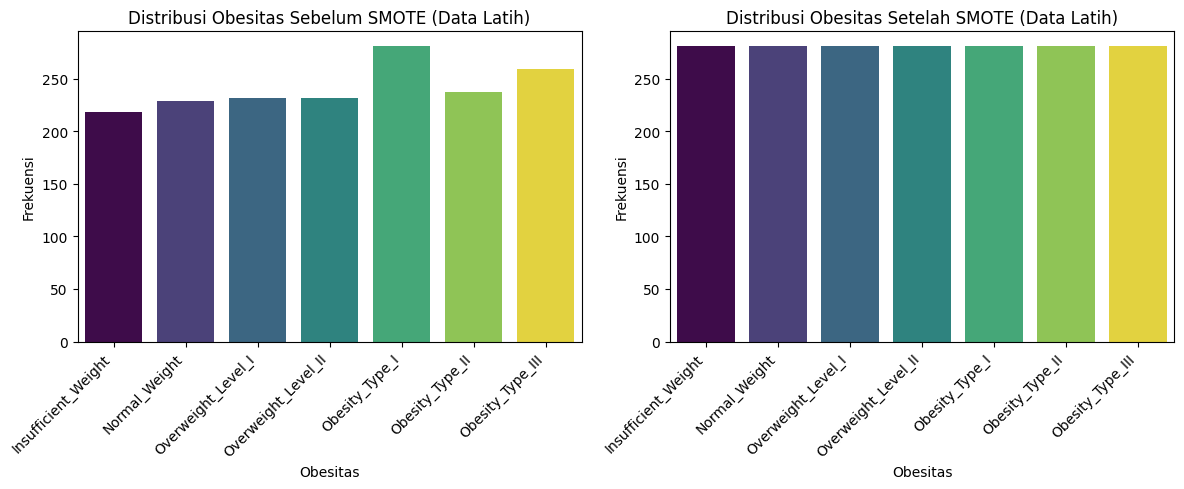

In [25]:
plt.figure(figsize=(12, 5))

# --- Plot sebelum SMOTE ---
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis', hue=y_train, legend=False)
plt.title('Distribusi Obesitas Sebelum SMOTE (Data Latih)')
plt.xlabel('Obesitas')
plt.ylabel('Frekuensi')
plt.xticks(ticks=range(len(target_names)), labels=target_names, rotation=45, ha='right')

# --- Plot sesudah SMOTE ---
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_res, palette='viridis', hue=y_train_res, legend=False)
plt.title('Distribusi Obesitas Setelah SMOTE (Data Latih)')
plt.xlabel('Obesitas')
plt.ylabel('Frekuensi')
plt.xticks(ticks=range(len(target_names)), labels=target_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

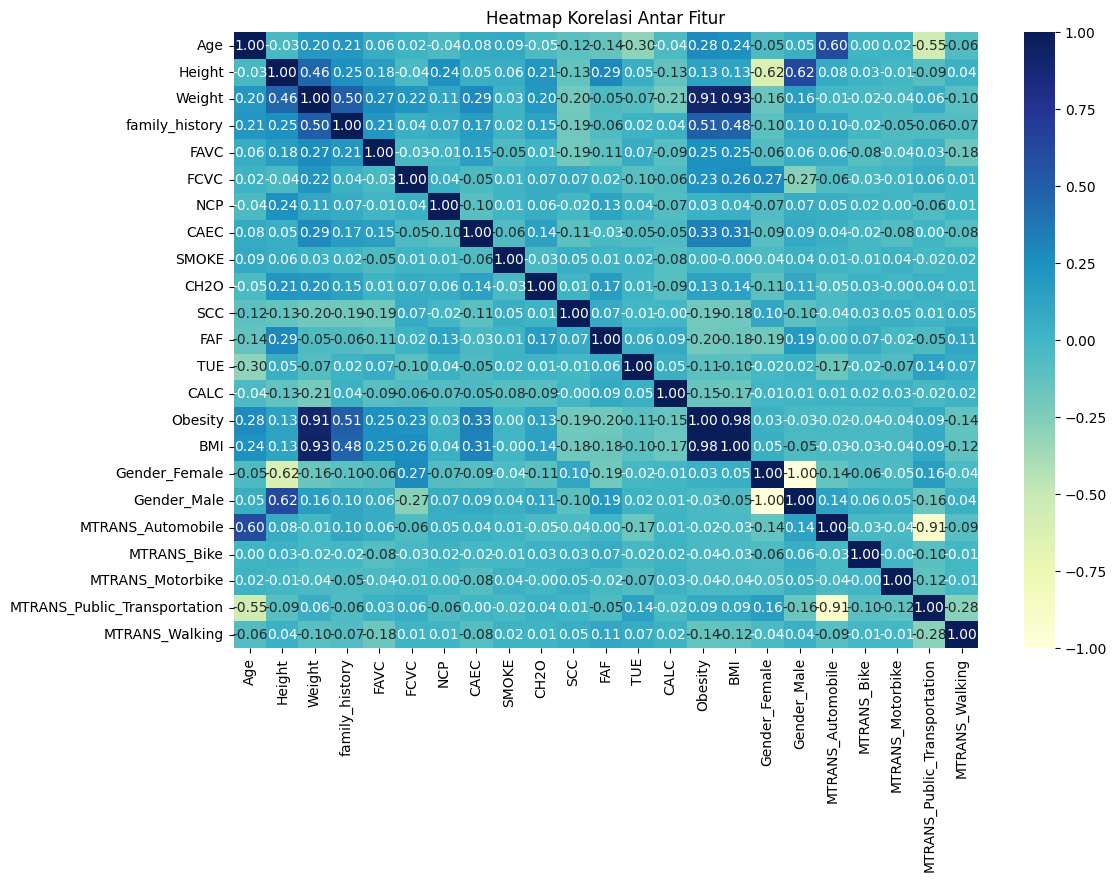

In [26]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Modelling

In [27]:
# Fungsi untuk penggunaan memori
def get_memory_usage():
    mem = psutil.virtual_memory()
    return mem.used / (1024 ** 3)

### LR

In [28]:
# Logistic Regression Tanpa Hyperparameter
logreg = LogisticRegression(random_state=0)

# Latih model dengan parameter default
mem_before_train_lr = get_memory_usage()
start_time_lr_train = time.time()
logreg.fit(X_train_res, y_train_res)
end_time_lr_train = time.time()
train_time_lr = end_time_lr_train - start_time_lr_train
mem_after_train_lr = get_memory_usage()
mem_train_lr = mem_after_train_lr - mem_before_train_lr

# Prediksi Logistic Regression pada data validasi
mem_before_pred_valid_lr = get_memory_usage()
start_time_lr_pred_valid = time.time()
y_pred_lr_valid = logreg.predict(X_valid_scaled)
end_time_lr_pred_valid = time.time()
pred_valid_time = end_time_lr_pred_valid - start_time_lr_pred_valid
mem_after_pred_valid_lr = get_memory_usage()
mem_pred_valid_lr = mem_after_pred_valid_lr - mem_before_pred_valid_lr

# Prediksi Logistic Regression pada data uji
mem_before_pred_test_lr = get_memory_usage()
start_time_lr_pred_test = time.time()
y_pred_lr_test = logreg.predict(X_test_scaled)
end_time_lr_pred_test = time.time()
pred_test_time = end_time_lr_pred_test - start_time_lr_pred_test
mem_after_pred_test_lr = get_memory_usage()
mem_pred_test_lr = mem_after_pred_test_lr - mem_before_pred_test_lr

# Parameter baseline
print("Parameter baseline untuk Logistic Regression:")
print(logreg.get_params())

# Hasil
print(f"Waktu yang dibutuhkan untuk melatih model Logistic Regression: {train_time_lr:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time:.4f} detik")

print(f"Penggunaan memori sebelum training: {mem_before_train_lr:.2f} GB")
print(f"Penggunaan memori setelah training: {mem_after_train_lr:.2f} GB")
print(f"Penggunaan memori sebelum prediksi validasi: {mem_before_pred_valid_lr:.2f} GB")
print(f"Penggunaan memori setelah prediksi validasi: {mem_after_pred_valid_lr:.2f} GB")
print(f"Penggunaan memori sebelum prediksi uji: {mem_before_pred_test_lr:.2f} GB")
print(f"Penggunaan memori setelah prediksi uji: {mem_after_pred_test_lr:.2f} GB")
print(f"Penggunaan memori selama pelatihan: {mem_train_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_lr:.2f} GB")

# Evaluasi model pada data validasi
print("Akurasi Model Logistic Regression pada data validasi:", accuracy_score(y_valid, y_pred_lr_valid))
print("\nClassification Report Model Logistic Regression pada data validasi:\n", classification_report(y_valid, y_pred_lr_valid, target_names=target_names))

# Evaluasi model pada data uji
print("Akurasi Model Logistic Regression pada data uji:", accuracy_score(y_test, y_pred_lr_test))
print("\nClassification Report Model Logistic Regression pada data uji:\n", classification_report(y_test, y_pred_lr_test, target_names=target_names))

Parameter baseline untuk Logistic Regression:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Waktu yang dibutuhkan untuk melatih model Logistic Regression: 0.0707 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: 0.0007 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: 0.0004 detik
Penggunaan memori sebelum training: 6.34 GB
Penggunaan memori setelah training: 6.33 GB
Penggunaan memori sebelum prediksi validasi: 6.33 GB
Penggunaan memori setelah prediksi validasi: 6.33 GB
Penggunaan memori sebelum prediksi uji: 6.34 GB
Penggunaan memori setelah prediksi uji: 6.34 GB
Penggunaan memori selama pelatihan: -0.01 GB
Penggunaan memori selama prediksi validasi: -0.00 GB
Penggunaan memori selama prediksi uji: -0.00 GB
Akurasi

#### Confusion Matrix LR

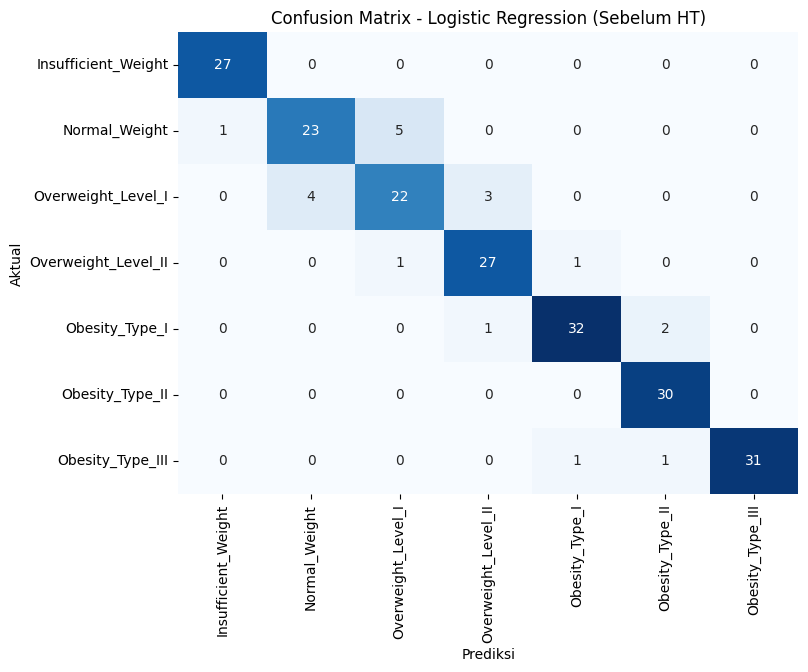

In [29]:
# Visualisasi Confusion Matrix untuk Logistic Regression (Sebelum Hyperparameter Tuning)
cm_lr_test = confusion_matrix(y_test, y_pred_lr_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Logistic Regression (Sebelum HT)')
plt.show()

### XGBOOST

In [30]:
# XGBoost Tanpa Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(random_state=0, eval_metric='mlogloss')

# Latih model XGBoost dengan parameter default
mem_before_train_xgb = get_memory_usage()
start_time_xgb_train = time.time()
xgb_model.fit(X_train_res, y_train_res)
end_time_xgb_train = time.time()
train_time_xgb = end_time_xgb_train - start_time_xgb_train
mem_after_train_xgb = get_memory_usage()
mem_train_xgb = mem_after_train_xgb - mem_before_train_xgb

# Prediksi dengan model XGBoost pada data validasi
mem_before_pred_valid_xgb = get_memory_usage()
start_time_xgb_pred_valid = time.time()
y_pred_xgb_valid = xgb_model.predict(X_valid_scaled)
end_time_xgb_pred_valid = time.time()
pred_valid_time_xgb = end_time_xgb_pred_valid - start_time_xgb_pred_valid
mem_after_pred_valid_xgb = get_memory_usage()
mem_pred_valid_xgb = mem_after_pred_valid_xgb - mem_before_pred_valid_xgb

# Prediksi XGBoost pada data uji
mem_before_pred_test_xgb = get_memory_usage()
start_time_xgb_pred_test = time.time()
y_pred_xgb_test = xgb_model.predict(X_test_scaled)
end_time_xgb_pred_test = time.time()
pred_test_time_xgb = end_time_xgb_pred_test - start_time_xgb_pred_test
mem_after_pred_test_xgb = get_memory_usage()
mem_pred_test_xgb = mem_after_pred_test_xgb - mem_before_pred_test_xgb

# Parameter baseline
print("Parameter baseline untuk XGBoost:")
print(xgb_model.get_params())

# Hasil
print(f"Waktu yang dibutuhkan untuk melatih model XGBoost: {train_time_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time_xgb:.4f} detik")

print(f"Penggunaan memori sebelum training: {mem_before_train_xgb:.2f} GB")
print(f"Penggunaan memori setelah training: {mem_after_train_xgb:.2f} GB")
print(f"Penggunaan memori sebelum prediksi validasi: {mem_before_pred_valid_xgb:.2f} GB")
print(f"Penggunaan memori setelah prediksi validasi: {mem_after_pred_valid_xgb:.2f} GB")
print(f"Penggunaan memori sebelum prediksi uji: {mem_before_pred_test_xgb:.2f} GB")
print(f"Penggunaan memori setelah prediksi uji: {mem_after_pred_test_xgb:.2f} GB")
print(f"Penggunaan memori selama pelatihan: {mem_train_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_xgb:.2f} GB")

# Evaluasi model pada data validasi
print("Akurasi Model XGBoost pada data validasi:", accuracy_score(y_valid, y_pred_xgb_valid))
print("\nClassification Report Model XGBoost pada data validasi:\n", classification_report(y_valid, y_pred_xgb_valid, target_names=target_names))

# Evaluasi model pada data uji
print("Akurasi Model XGBoost pada data uji:", accuracy_score(y_test, y_pred_xgb_test))
print("\nClassification Report Model XGBoost pada data uji:\n", classification_report(y_test, y_pred_xgb_test, target_names=target_names))


Parameter baseline untuk XGBoost:
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 0, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Waktu yang dibutuhkan untuk melatih mod

#### Confusion Matrix XGBoost

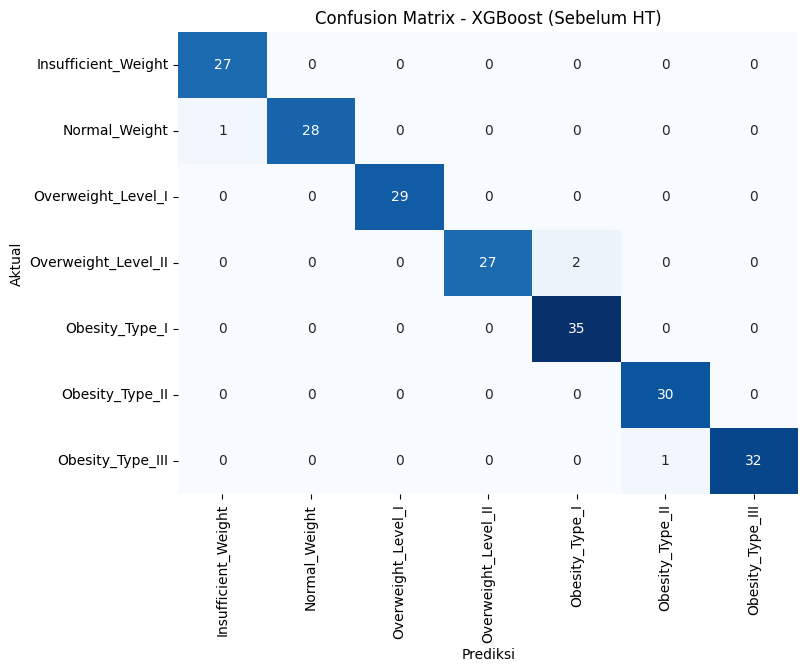

In [31]:
# Visualisasi Confusion Matrix untuk XGBoost (Sebelum Hyperparameter Tuning)
cm_xgb_test = confusion_matrix(y_test, y_pred_xgb_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - XGBoost (Sebelum HT)')
plt.show()

# Evaluasi

In [32]:
#Evaluasi model sebelum hyperparameter tuning

# Prediksi Logistic Regression pada data uji
print(f"Waktu yang dibutuhkan untuk melatih model Logistic Regression: {train_time_lr:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time:.4f} detik")
print(f"Penggunaan memori selama pelatihan: {mem_train_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_lr:.2f} GB")
print("Akurasi Model Logistic Regression pada data uji:", accuracy_score(y_test, y_pred_lr_test))
print("\nClassification Report Model Logistic Regression pada data uji:\n", classification_report(y_test, y_pred_lr_test, target_names=target_names))

# Prediksi XGBoost pada data uji
print(f"Waktu yang dibutuhkan untuk melatih model XGBoost: {train_time_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time_xgb:.4f} detik")
print(f"Penggunaan memori selama pelatihan: {mem_train_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_xgb:.2f} GB")
print("Akurasi Model XGBoost pada data uji:", accuracy_score(y_test, y_pred_xgb_test))
print("\nClassification Report Model XGBoost pada data uji:\n", classification_report(y_test, y_pred_xgb_test, target_names=target_names))

Waktu yang dibutuhkan untuk melatih model Logistic Regression: 0.0707 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: 0.0007 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: 0.0004 detik
Penggunaan memori selama pelatihan: -0.01 GB
Penggunaan memori selama prediksi validasi: -0.00 GB
Penggunaan memori selama prediksi uji: -0.00 GB
Akurasi Model Logistic Regression pada data uji: 0.9056603773584906

Classification Report Model Logistic Regression pada data uji:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        27
      Normal_Weight       0.85      0.79      0.82        29
 Overweight_Level_I       0.79      0.76      0.77        29
Overweight_Level_II       0.87      0.93      0.90        29
     Obesity_Type_I       0.94      0.91      0.93        35
    Obesity_Type_II       0.91      1.00      0.95        30
   Obesity_Type_III       1.00      0.94      0.97        33



### LR dengan HT

In [33]:
# Hyperparameter Tuning untuk Logistic Regression

# Parameter grid untuk Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'liblinear'],
    'max_iter': [1000, 2000, 5000, 10000],
    'penalty' : ['l1', 'l2']
}

# Inisialisasi Logistic Regression
logreg = LogisticRegression(random_state=0)

# GridSearchCV untuk Logistic Regression
grid_search_lr = GridSearchCV(estimator=logreg,
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)

# Latih model dengan GridSearchCV pada data latih
mem_before_train_grid_search_lr = get_memory_usage()
start_time_grid_search_lr = time.time()
grid_search_lr.fit(X_train_res, y_train_res)
end_time_grid_search_lr = time.time()
train_time_grid_search_lr = end_time_grid_search_lr - start_time_grid_search_lr
mem_after_train_grid_search_lr = get_memory_usage()
mem_train_grid_search_lr = mem_after_train_grid_search_lr - mem_before_train_grid_search_lr

# Prediksi dengan model terbaik pada data validasi
mem_before_pred_valid_grid_search_lr = get_memory_usage()
start_time_grid_search_lr_pred_valid = time.time()
y_pred_lr = grid_search_lr.best_estimator_.predict(X_valid_scaled)
end_time_grid_search_lr_pred_valid = time.time()
pred_valid_time_grid_search_lr = end_time_grid_search_lr_pred_valid - start_time_grid_search_lr_pred_valid
mem_after_pred_valid_grid_search_lr = get_memory_usage()
mem_pred_valid_grid_search_lr = mem_after_pred_valid_grid_search_lr - mem_before_pred_valid_grid_search_lr

# Prediksi dengan model terbaik pada data uji
mem_before_pred_test_grid_search_lr = get_memory_usage()
start_time_grid_search_lr_pred_test = time.time()
y_pred_lr_test_HT = grid_search_lr.best_estimator_.predict(X_test_scaled)
end_time_grid_search_lr_pred_test = time.time()
pred_test_time_grid_search_lr = end_time_grid_search_lr_pred_test - start_time_grid_search_lr_pred_test
mem_after_pred_test_grid_search_lr = get_memory_usage()
mem_pred_test_grid_search_lr = mem_after_pred_test_grid_search_lr - mem_before_pred_test_grid_search_lr

# Parameter terbaik untuk Logistic Regression
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")

# Hasil
print(f"Waktu yang dibutuhkan untuk melakukan Grid Search pada Logistic Regression: {train_time_grid_search_lr:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time_grid_search_lr:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time_grid_search_lr:.4f} detik")

print(f"Penggunaan memori sebelum training: {mem_before_train_grid_search_lr:.2f} GB")
print(f"Penggunaan memori setelah training: {mem_after_train_grid_search_lr:.2f} GB")
print(f"Penggunaan memori sebelum prediksi validasi: {mem_before_pred_valid_grid_search_lr:.2f} GB")
print(f"Penggunaan memori setelah prediksi validasi: {mem_after_pred_valid_grid_search_lr:.2f} GB")
print(f"Penggunaan memori sebelum prediksi uji: {mem_before_pred_test_grid_search_lr:.2f} GB")
print(f"Penggunaan memori setelah prediksi uji: {mem_after_pred_test_grid_search_lr:.2f} GB")
print(f"Penggunaan memori selama pelatihan: {mem_train_grid_search_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_grid_search_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_grid_search_lr:.2f} GB")

# Evaluasi model pada data validasi
print("Akurasi Model Logistic Regression pada data validasi:", accuracy_score(y_valid, y_pred_lr))
print("\nClassification Report Model Logistic Regression pada data validasi:\n", classification_report(y_valid, y_pred_lr, target_names=target_names))

# Evaluasi model pada data uji
print("Akurasi Model Logistic Regression pada data uji:", accuracy_score(y_test, y_pred_lr_test_HT))
print("\nClassification Report Model Logistic Regression pada data uji:\n", classification_report(y_test, y_pred_lr_test_HT, target_names=target_names))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for Logistic Regression: {'C': 100, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
Waktu yang dibutuhkan untuk melakukan Grid Search pada Logistic Regression: 87.4397 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: 0.0010 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: 0.0003 detik
Penggunaan memori sebelum training: 6.10 GB
Penggunaan memori setelah training: 6.55 GB
Penggunaan memori sebelum prediksi validasi: 6.55 GB
Penggunaan memori setelah prediksi validasi: 6.55 GB
Penggunaan memori sebelum prediksi uji: 6.55 GB
Penggunaan memori setelah prediksi uji: 6.55 GB
Penggunaan memori selama pelatihan: 0.45 GB
Penggunaan memori selama prediksi validasi: -0.00 GB
Penggunaan memori selama prediksi uji: 0.00 GB
Akurasi Model Logistic Regression pada data validasi: 0.9715639810426541

Classification Report Model Logistic Regression pada data validasi:
            

#### Confusion Matrix LR

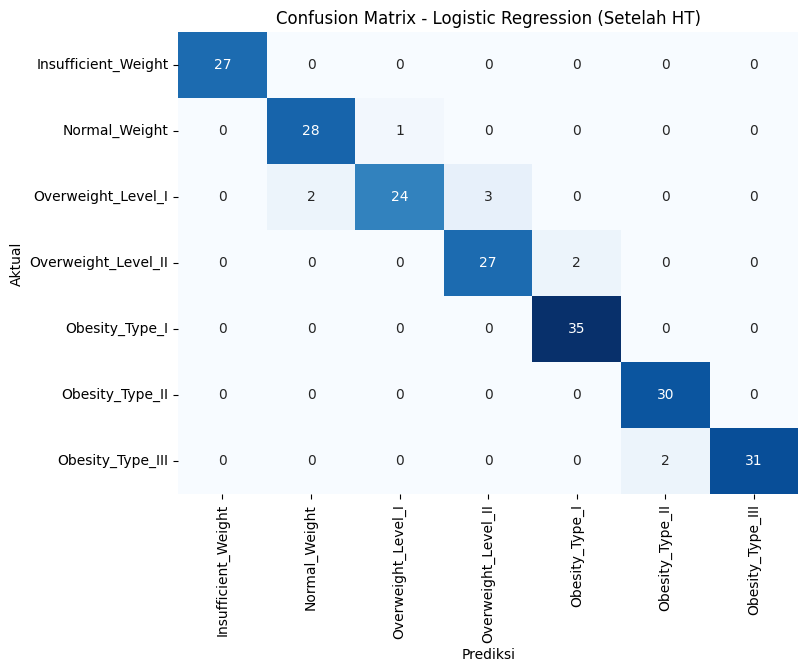

In [34]:
# Visualisasi Confusion Matrix untuk Logistic Regression (Setelah Hyperparameter Tuning)
cm_lr_test_HT = confusion_matrix(y_test, y_pred_lr_test_HT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_test_HT, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Logistic Regression (Setelah HT)')
plt.show()

### XGBOOST dengan HT

In [35]:
# Hyperparameter Tuning untuk XGBoost

# Parameter grid untuk XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'lambda':[0,1],
    'alpha':[0,1] 
}

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=0, eval_metric='mlogloss')

# GridSearchCV untuk XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)

# Melatih model dengan GridSearchCV pada data latih
mem_before_train_grid_search_xgb = get_memory_usage()
start_time_grid_search_xgb = time.time()
grid_search_xgb.fit(X_train_res, y_train_res)
end_time_grid_search_xgb = time.time()
train_time_grid_search_xgb = end_time_grid_search_xgb - start_time_grid_search_xgb
mem_after_train_grid_search_xgb = get_memory_usage()
mem_train_grid_search_xgb = mem_after_train_grid_search_xgb - mem_before_train_grid_search_xgb

# Prediksi dengan model terbaik pada data validasi
mem_before_pred_valid_grid_search_xgb = get_memory_usage()
start_time_grid_search_xgb_pred_valid = time.time()
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_valid_scaled)
end_time_grid_search_xgb_pred_valid = time.time()
pred_valid_time_grid_search_xgb = end_time_grid_search_xgb_pred_valid - start_time_grid_search_xgb_pred_valid
mem_after_pred_valid_grid_search_xgb = get_memory_usage()
mem_pred_valid_grid_search_xgb = mem_after_pred_valid_grid_search_xgb - mem_before_pred_valid_grid_search_xgb

# Prediksi dengan model terbaik pada data uji
mem_before_pred_test_grid_search_xgb = get_memory_usage()
start_time_grid_search_xgb_pred_test = time.time()
y_pred_xgb_test_HT = grid_search_xgb.best_estimator_.predict(X_test_scaled)
end_time_grid_search_xgb_pred_test = time.time()
pred_test_time_grid_search_xgb = end_time_grid_search_xgb_pred_test - start_time_grid_search_xgb_pred_test
mem_after_pred_test_grid_search_xgb = get_memory_usage()
mem_pred_test_grid_search_xgb = mem_after_pred_test_grid_search_xgb - mem_before_pred_test_grid_search_xgb

# Menampilkan parameter terbaik untuk XGBoost
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

# Hasil
print(f"Waktu yang dibutuhkan untuk melakukan Grid Search pada XGBoost: {train_time_grid_search_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time_grid_search_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time_grid_search_xgb:.4f} detik")

print(f"Penggunaan memori sebelum training: {mem_before_train_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori setelah training: {mem_after_train_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori sebelum prediksi validasi: {mem_before_pred_valid_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori setelah prediksi validasi: {mem_after_pred_valid_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori sebelum prediksi uji: {mem_before_pred_test_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori setelah prediksi uji: {mem_after_pred_test_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori selama pelatihan: {mem_train_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_grid_search_xgb:.2f} GB")

# Evaluasi model pada data validasi
print("Akurasi Model XGBoost pada data validasi:", accuracy_score(y_valid, y_pred_xgb))
print("\nClassification Report Model XGBoost pada data validasi:\n", classification_report(y_valid, y_pred_xgb, target_names=target_names))

# Evaluasi model pada data uji
print("Akurasi Model XGBoost pada data uji:", accuracy_score(y_test, y_pred_xgb_test_HT))
print("\nClassification Report Model XGBoost pada data uji:\n", classification_report(y_test, y_pred_xgb_test_HT, target_names=target_names))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters for XGBoost: {'alpha': 0, 'colsample_bytree': 0.8, 'lambda': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Waktu yang dibutuhkan untuk melakukan Grid Search pada XGBoost: 277.9952 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: 0.0037 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: 0.0022 detik
Penggunaan memori sebelum training: 6.60 GB
Penggunaan memori setelah training: 6.84 GB
Penggunaan memori sebelum prediksi validasi: 6.84 GB
Penggunaan memori setelah prediksi validasi: 6.84 GB
Penggunaan memori sebelum prediksi uji: 6.84 GB
Penggunaan memori setelah prediksi uji: 6.83 GB
Penggunaan memori selama pelatihan: 0.24 GB
Penggunaan memori selama prediksi validasi: -0.00 GB
Penggunaan memori selama prediksi uji: -0.01 GB
Akurasi Model XGBoost pada data validasi: 0.981042654028436

Classification Report Model XGBoost pada data val

#### Confusion Matrix XGBoost

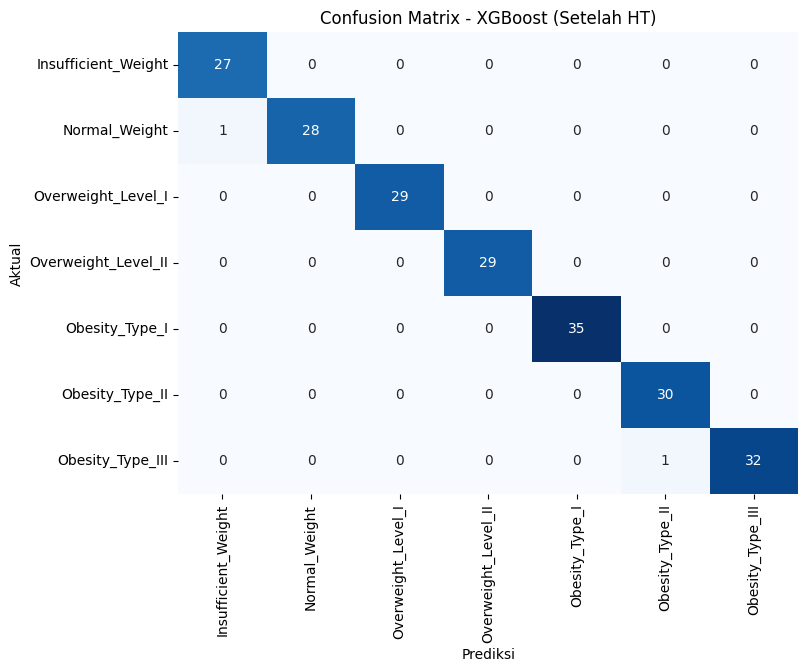

In [36]:
# Visualisasi Confusion Matrix untuk XGBoost (Setelah Hyperparameter Tuning)
cm_xgb_test_HT = confusion_matrix(y_test, y_pred_xgb_test_HT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_test_HT, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - XGBoost (Setelah HT)')
plt.show()

# Evaluasi HT

In [37]:
#Evaluasi model setelah hyperparameter tuning

# Prediksi Logistic Regression pada data uji
print(f"Waktu yang dibutuhkan untuk melakukan Grid Search pada Logistic Regression: {train_time_grid_search_lr:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time_grid_search_lr:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time_grid_search_lr:.4f} detik")
print(f"Penggunaan memori selama pelatihan: {mem_train_grid_search_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_grid_search_lr:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_grid_search_lr:.2f} GB")
print("Akurasi Model Logistic Regression pada data uji:", accuracy_score(y_test, y_pred_lr_test_HT))
print("\nClassification Report Model Logistic Regression pada data uji:\n", classification_report(y_test, y_pred_lr_test_HT, target_names=target_names))

# Prediksi XGBoost pada data uji
print(f"Waktu yang dibutuhkan untuk melakukan Grid Search pada XGBoost: {train_time_grid_search_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: {pred_valid_time_grid_search_xgb:.4f} detik")
print(f"Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: {pred_test_time_grid_search_xgb:.4f} detik")
print(f"Penggunaan memori selama pelatihan: {mem_train_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi validasi: {mem_pred_valid_grid_search_xgb:.2f} GB")
print(f"Penggunaan memori selama prediksi uji: {mem_pred_test_grid_search_xgb:.2f} GB")
print("Akurasi Model XGBoost pada data uji:", accuracy_score(y_test, y_pred_xgb_test_HT))
print("\nClassification Report Model XGBoost pada data uji:\n", classification_report(y_test, y_pred_xgb_test_HT, target_names=target_names))

Waktu yang dibutuhkan untuk melakukan Grid Search pada Logistic Regression: 87.4397 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data validasi: 0.0010 detik
Waktu yang dibutuhkan untuk melakukan prediksi pada data uji: 0.0003 detik
Penggunaan memori selama pelatihan: 0.45 GB
Penggunaan memori selama prediksi validasi: -0.00 GB
Penggunaan memori selama prediksi uji: 0.00 GB
Akurasi Model Logistic Regression pada data uji: 0.9528301886792453

Classification Report Model Logistic Regression pada data uji:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        27
      Normal_Weight       0.93      0.97      0.95        29
 Overweight_Level_I       0.96      0.83      0.89        29
Overweight_Level_II       0.90      0.93      0.92        29
     Obesity_Type_I       0.95      1.00      0.97        35
    Obesity_Type_II       0.94      1.00      0.97        30
   Obesity_Type_III       1.00      0.94      0.97

# Perbandingan Kinerja

In [38]:
# Logistic Regression sebelum HT
accuracy_lr = accuracy_score(y_test, y_pred_lr_test)
precision_lr = precision_score(y_test, y_pred_lr_test, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr_test, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr_test, average='weighted')

# Logistic Regression setelah HT
accuracy_lr_ht = accuracy_score(y_test, y_pred_lr_test_HT)
precision_lr_ht = precision_score(y_test, y_pred_lr_test_HT, average='weighted')
recall_lr_ht = recall_score(y_test, y_pred_lr_test_HT, average='weighted')
f1_lr_ht = f1_score(y_test, y_pred_lr_test_HT, average='weighted')

# XGBoost sebelum HT
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_test)
precision_xgb = precision_score(y_test, y_pred_xgb_test, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb_test, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb_test, average='weighted')

# XGBoost setelah HT
accuracy_xgb_ht = accuracy_score(y_test, y_pred_xgb_test_HT)
precision_xgb_ht = precision_score(y_test, y_pred_xgb_test_HT, average='weighted')
recall_xgb_ht = recall_score(y_test, y_pred_xgb_test_HT, average='weighted')
f1_xgb_ht = f1_score(y_test, y_pred_xgb_test_HT, average='weighted')

comparison_metrics = pd.DataFrame({
    'Model': ['Logistic Regression (Sebelum HT)', 'Logistic Regression (Setelah HT)', 'XGBoost (Sebelum HT)', 'XGBoost (Setelah HT)'],
    'Accuracy': [accuracy_lr, accuracy_lr_ht, accuracy_xgb, accuracy_xgb_ht],
    'Precision (weighted)': [precision_lr, precision_lr_ht, precision_xgb, precision_xgb_ht],
    'Recall (weighted)': [recall_lr, recall_lr_ht, recall_xgb, recall_xgb_ht],
    'F1-Score (weighted)': [f1_lr, f1_lr_ht, f1_xgb, f1_xgb_ht]
})

print("Perbandingan Metrik Evaluasi Model:")
display(comparison_metrics)

Perbandingan Metrik Evaluasi Model:


,Model,Accuracy,Precision (weighted),Recall (weighted),F1-Score (weighted)
0,Logistic Regression (Sebelum HT),0.905660,0.905647,0.905660,0.904813
1,Logistic Regression (Setelah HT),0.952830,0.953961,0.952830,0.952238
2,XGBoost (Sebelum HT),0.981132,0.981963,0.981132,0.981099
3,XGBoost (Setelah HT),0.990566,0.990887,0.990566,0.990570


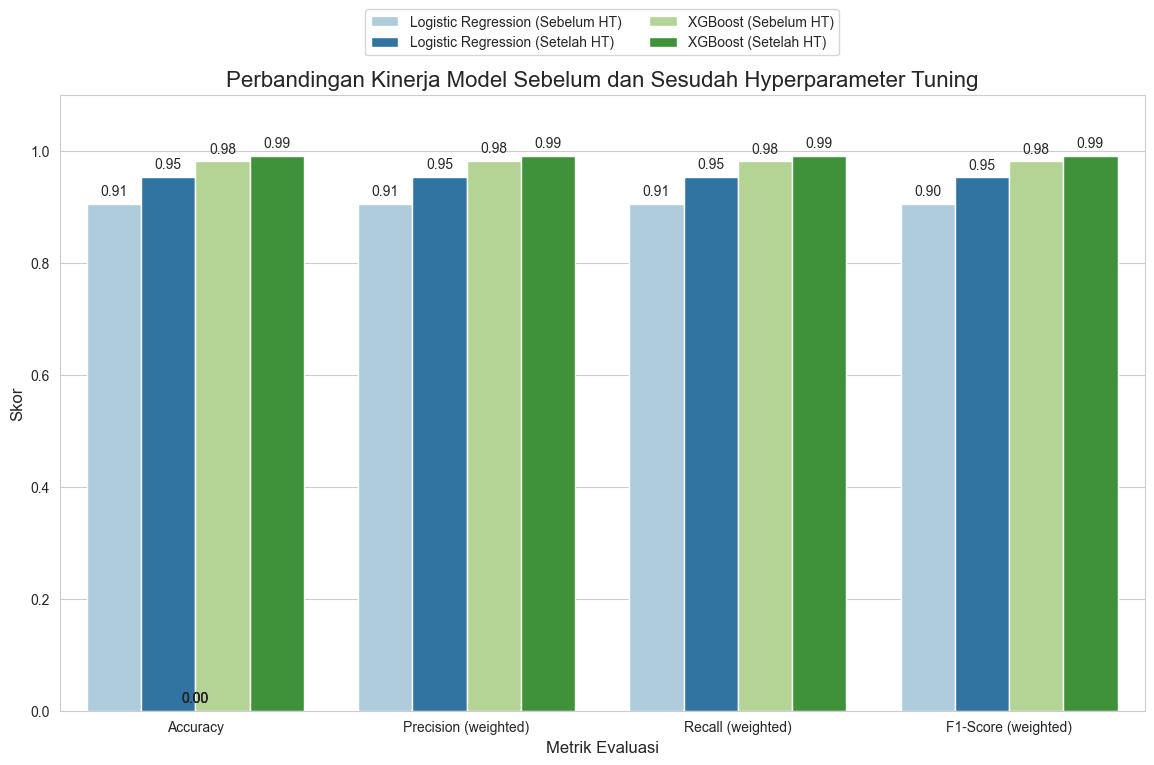

In [39]:
# Reshape the DataFrame for easier plotting with seaborn
df_melted = comparison_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set a style for the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette='Paired')

# Set the title and labels
plt.title('Perbandingan Kinerja Model Sebelum dan Sesudah Hyperparameter Tuning', fontsize=16)
plt.xlabel('Metrik Evaluasi', fontsize=12)
plt.ylabel('Skor', fontsize=12)
plt.ylim(0, 1.1)

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Save the figure
plt.savefig('comparison_plot.png', dpi=300, bbox_inches='tight')

plt.show()

# Perbandingan Confussion Mtarix

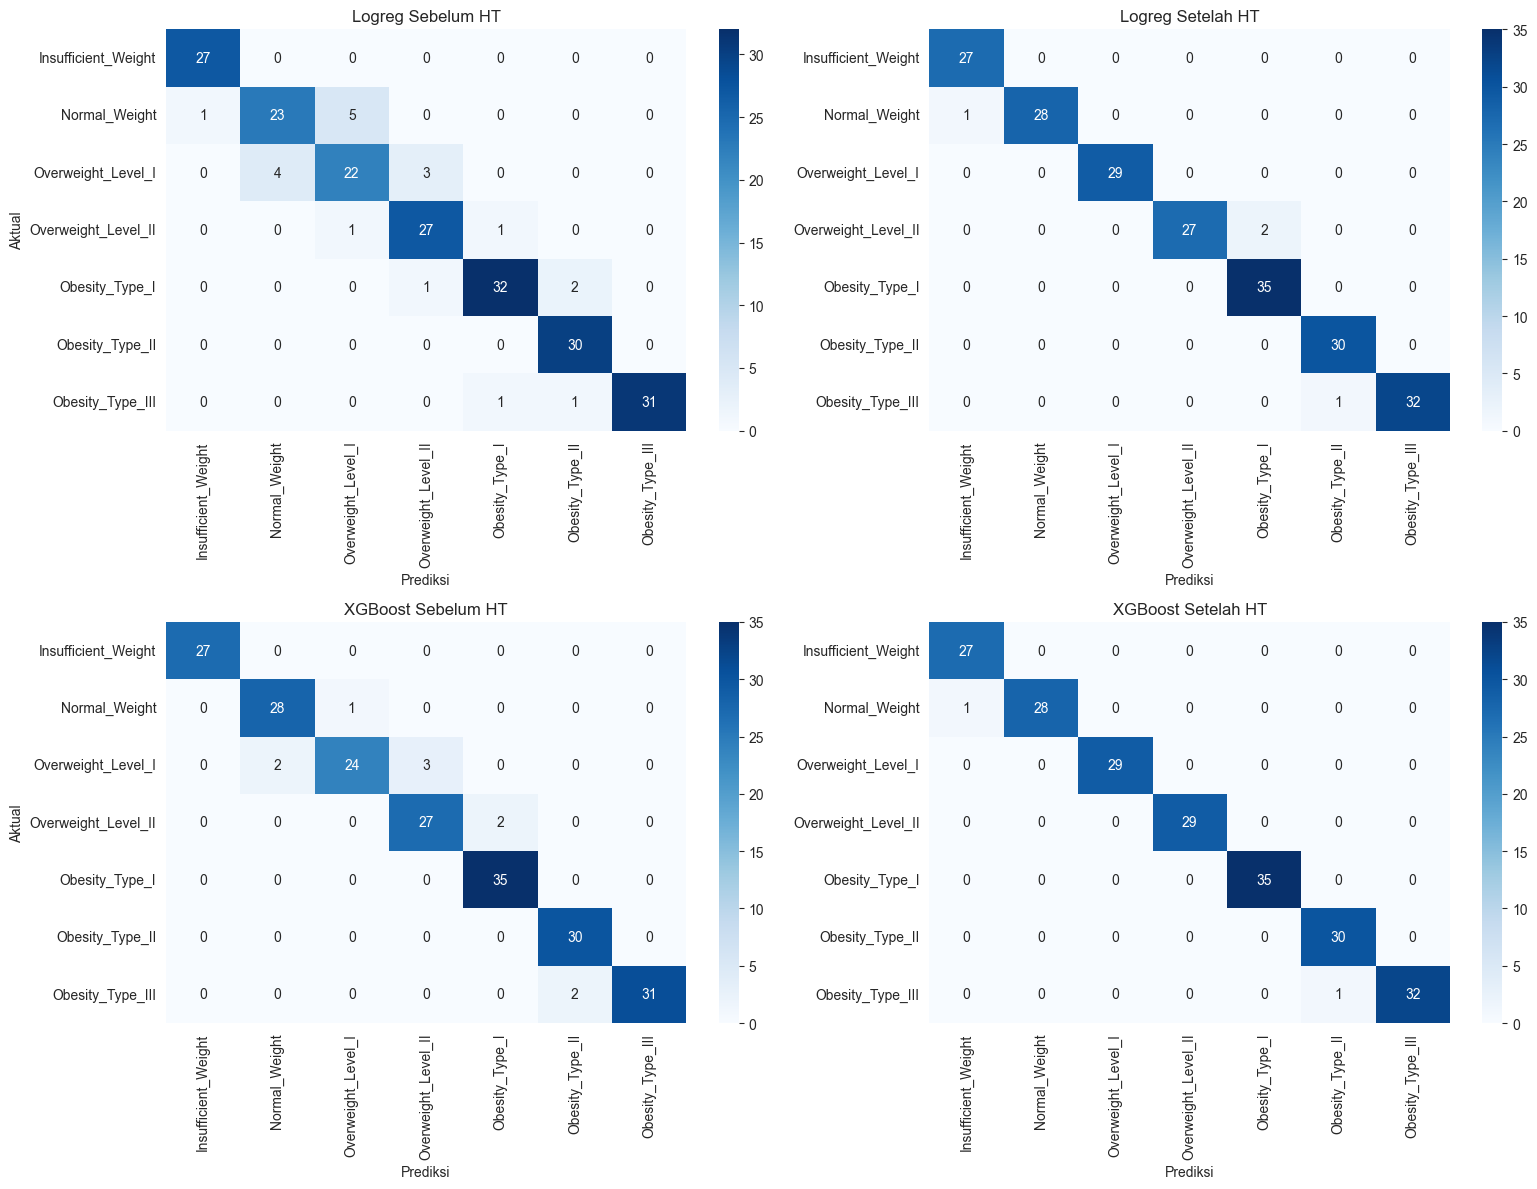

In [40]:
cm_lr_test = confusion_matrix(y_test, y_pred_lr_test)
cm_xgb_test = confusion_matrix(y_test, y_pred_xgb_test)
cm_lr_test_HT = confusion_matrix(y_test, y_pred_lr_test_HT)
cm_xgb_test_HT = confusion_matrix(y_test, y_pred_xgb_test_HT)

fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # 2 baris x 2 kolom

# Baris 1
sns.heatmap(cm_lr_test, ax=axes[0,0], annot=True, fmt='d', cmap='Blues', 
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
axes[0,0].set_title('Logreg Sebelum HT')
axes[0,0].set_xlabel('Prediksi'); axes[0,0].set_ylabel('Aktual')

sns.heatmap(cm_xgb_test, ax=axes[0,1], annot=True, fmt='d', cmap='Blues', 
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
axes[0,1].set_title('Logreg Setelah HT')
axes[0,1].set_xlabel('Prediksi')

# Baris 2
sns.heatmap(cm_lr_test_HT, ax=axes[1,0], annot=True, fmt='d', cmap='Blues', 
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
axes[1,0].set_title('XGBoost Sebelum HT')
axes[1,0].set_xlabel('Prediksi'); axes[1,0].set_ylabel('Aktual')

sns.heatmap(cm_xgb_test_HT, ax=axes[1,1], annot=True, fmt='d', cmap='Blues', 
            xticklabels=category_to_value.keys(),
            yticklabels=category_to_value.keys())
axes[1,1].set_title('XGBoost Setelah HT')
axes[1,1].set_xlabel('Prediksi')

plt.tight_layout()
plt.show()


# Perbandingan Waktu

In [41]:
comparison_time = pd.DataFrame({
    'Model': ['Logistic Regression (Sebelum HT)', 'Logistic Regression (Setelah HT)', 'XGBoost (Sebelum HT)', 'XGBoost (Setelah HT)'],
    'Waktu Train (detik)': [train_time_lr, train_time_grid_search_lr, train_time_xgb, train_time_grid_search_xgb],
    'Waktu Prediksi Validasi (detik)': [pred_valid_time, pred_valid_time_grid_search_lr, pred_valid_time_xgb, pred_valid_time_grid_search_xgb],
    'Waktu Prediksi Uji (detik)': [pred_test_time, pred_test_time_grid_search_lr, pred_test_time_xgb, pred_test_time_grid_search_xgb]
})

print("Perbandingan Waktu Pelatihan dan Prediksi:")
display(comparison_time)

Perbandingan Waktu Pelatihan dan Prediksi:


,Model,Waktu Train (detik),Waktu Prediksi Validasi (detik),Waktu Prediksi Uji (detik)
0,Logistic Regression (Sebelum HT),0.070670,0.000725,0.000417
1,Logistic Regression (Setelah HT),87.439702,0.000952,0.000309
2,XGBoost (Sebelum HT),1.548019,0.002194,0.001290
3,XGBoost (Setelah HT),277.995152,0.003747,0.002243


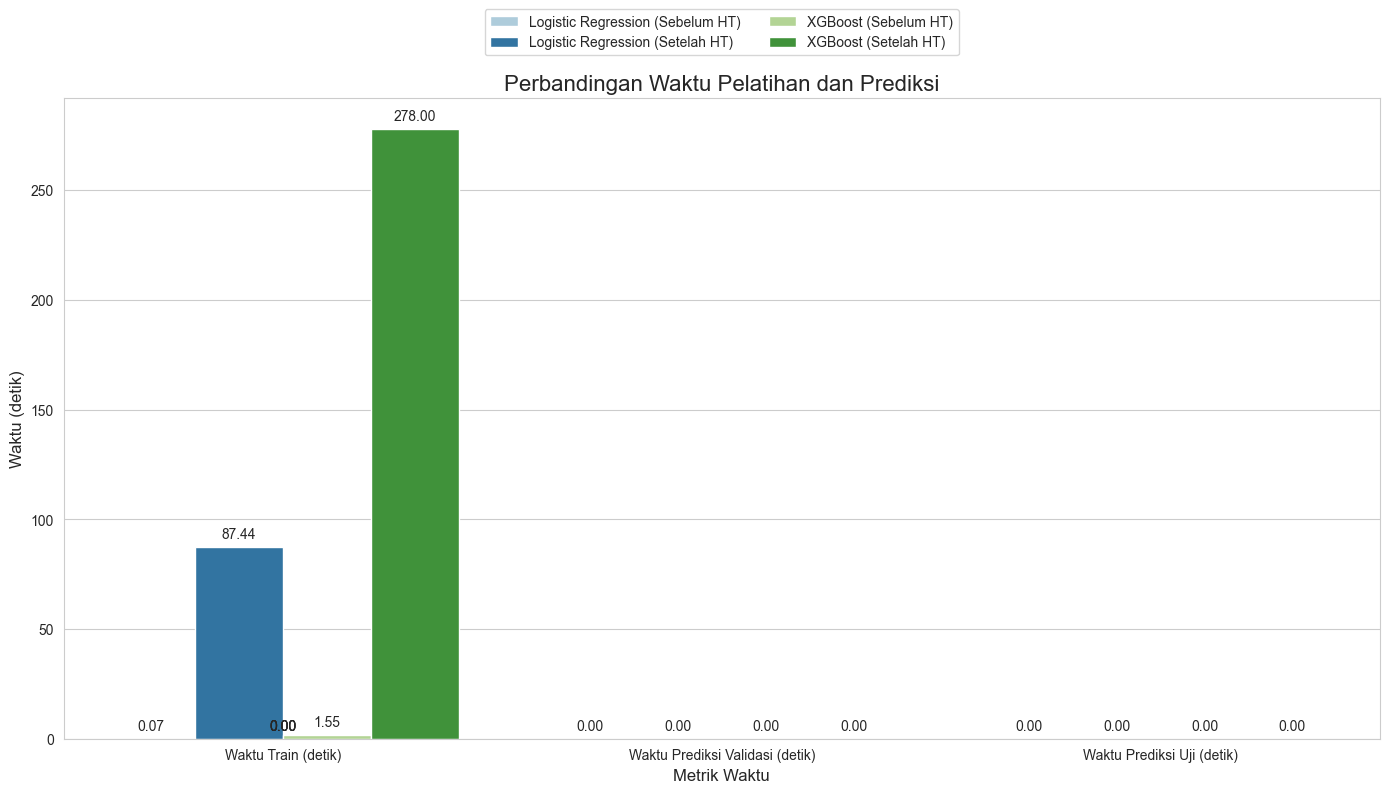

In [42]:
# Mengubah format DataFrame agar sesuai untuk visualisasi
df_melted_time = comparison_time.melt(id_vars='Model', var_name='Metric', value_name='Time (seconds)')

# Mengatur style plot
sns.set_style("whitegrid")

# Membuat plot dengan grafik batang
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Metric', y='Time (seconds)', hue='Model', data=df_melted_time, palette='Paired')

# Mengatur judul dan label
plt.title('Perbandingan Waktu Pelatihan dan Prediksi', fontsize=16)
plt.xlabel('Metrik Waktu', fontsize=12)
plt.ylabel('Waktu (detik)', fontsize=12)

# Menambahkan label nilai di atas batang
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# Menempatkan legenda di atas tengah
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()
plt.show()

# Perbandingan Memori

In [43]:
comparison_memory_usage = pd.DataFrame({
    'Model': ['Logistic Regression (Sebelum HT)', 'Logistic Regression (Setelah HT)', 'XGBoost (Sebelum HT)', 'XGBoost (Setelah HT)'],
    'Memori Train (GB)': [mem_train_lr, mem_train_grid_search_lr, mem_train_xgb, mem_train_grid_search_xgb],
    'Memori Prediksi Validasi (GB)': [mem_pred_valid_lr, mem_pred_valid_grid_search_lr, mem_pred_valid_xgb, mem_pred_valid_grid_search_xgb],
    'Memori Prediksi Uji (GB)': [mem_pred_test_lr, mem_pred_test_grid_search_lr, mem_pred_test_xgb, mem_pred_test_grid_search_xgb]
})

print("Perbandingan Penggunaan Memori Selama Proses:")
display(comparison_memory_usage)

Perbandingan Penggunaan Memori Selama Proses:


,Model,Memori Train (GB),Memori Prediksi Validasi (GB),Memori Prediksi Uji (GB)
0,Logistic Regression (Sebelum HT),-0.007240,-0.001324,-0.001823
1,Logistic Regression (Setelah HT),0.449154,-0.000019,0.000000
2,XGBoost (Sebelum HT),-0.079445,-0.001610,0.006332
3,XGBoost (Setelah HT),0.235321,-0.000355,-0.006603


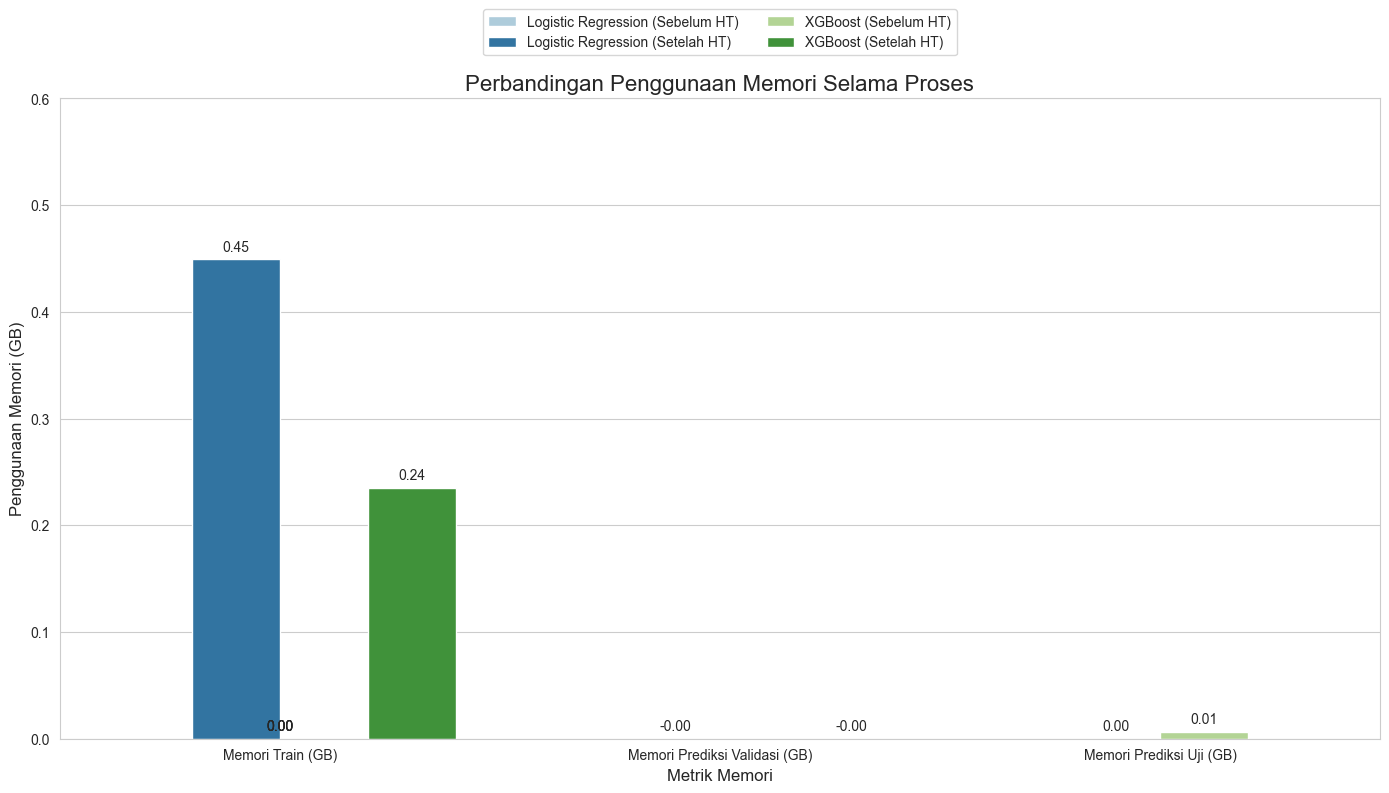

In [44]:
# Mengubah format DataFrame agar sesuai untuk visualisasi
df_melted_memory = comparison_memory_usage.melt(id_vars='Model', var_name='Metric', value_name='Memory Usage (GB)')

# Mengatur style plot
sns.set_style("whitegrid")

# Membuat plot dengan grafik batang
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Metric', y='Memory Usage (GB)', hue='Model', data=df_melted_memory, palette='Paired')

# Mengatur judul dan label
plt.title('Perbandingan Penggunaan Memori Selama Proses', fontsize=16)
plt.xlabel('Metrik Memori', fontsize=12)
plt.ylabel('Penggunaan Memori (GB)', fontsize=12)
plt.ylim(0, 0.6)

# Menambahkan label nilai di atas batang
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# Menempatkan legenda di atas tengah
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()
plt.show()

Simpan model

In [45]:
import pickle

# Simpan model XGBoost terbaik (setelah HT) ke file .pkl
filename = 'xgboost_obesity_model.pkl'
pickle.dump(grid_search_xgb.best_estimator_, open(filename, 'wb'))

print(f"Model XGBoost terbaik (setelah HT) telah disimpan ke '{filename}'")

Model XGBoost terbaik (setelah HT) telah disimpan ke 'xgboost_obesity_model.pkl'


In [46]:
# Simpan model XGBoost terbaik (setelah HT) ke file .sav
filename = 'xgboost_obesity_model.sav'
pickle.dump(grid_search_xgb.best_estimator_, open(filename, 'wb'))

print(f"Model XGBoost terbaik (setelah HT) telah disimpan ke '{filename}'")

Model XGBoost terbaik (setelah HT) telah disimpan ke 'xgboost_obesity_model.sav'
